# SB 125
## Cycle 4, Spring FY2024
### Freight Truck Economic Competitiveness
Created March 2024  
Analysis and write-up completed by Noah Sanchez for Kelly McClendon for a request he received from CTC, Angel, and Hannah  
Geodatabase provided by Affi N'Guessan contained data from the FAF5 https://www.bts.gov/faf 

#### TCEP/SCCP Cycle 4
Project's included in the TCEP/SCCP Cycle 4 (https://experience.arcgis.com/experience/1173a09d9f7a452ca7be858c39546678/) were analyzed for freight movement to identify Freight Truck Economic Competitiveness. 

#### Methodology
ArcGIS was used to identify the segments in the FAF5 datasets that corresponded with Caltrans' Projects that were included in the TCEP/SCCP Cycle 4. Not all projects were included, only non-rail projects that had project lines that were within the limits of the various projects. Attribute tables that included the segments of the various projects were exported from ArcGIS Pro and imported into JupyterLab for this analysis. Each Project had the values in the column ['TOT_Tons_All_22'] averaged. 

#### Deliverable
This analysis is not a comprehensive economic analysis, but is being used to add to the conversation. The final deliverable is a CSV or Excel doc containing the Economic Competitive Analysis results and other general project information. The final deliverable was sent to Kelly McClendon and Affi N'Guessan via email on 3/21/2024. 

#### Additional Research
We discussed potential future analysis could be performed, including a more detailed breakdown of the freight being transported per segment in an effort to identify the average value of the freight in a given area.

In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow as pa
import pyarrow.parquet as pq
import os
import nbformat
from nbconvert import PDFExporter
from nbformat import read

In [2]:
# Assign the DataFrame names

# assign names to the datafile that were exported from the FAF5 geodatabase
# the exported data includes FAF5 segments (similar to OSM segments) that contain Truck Freight Flow data
# sln == "submission log number"
sln03_data = '03_links_flow_trucks_SR132_West_3A.csv'
sln04_data = '04_links_flow_trucks_Sac5_managed_lanes.csv'
sln05_data = '05_links_flow_trucks_Konocti.csv'
sln07_data = '07_links_flow_trucks_sr132_west_phase2.csv'
sln10_data = '10_links_flow_trucks_SR46East_UnionRoad.csv'
sln11_data = '11_links_flow_trucks_SR46_AntelopeGrade.csv'
sln12_data = '12_links_flow_trucks_805_15_Transit_Only_Connector.csv'
sln15_data = '15_links_flow_trucks_SantaBarbaraUS101.csv'
sln18_data = '18_links_flow_trucks_sr84_us101_Interchange.csv'
sln19_data = '19_links_flow_trucks_I680_SR4_Interchange.csv'
sln22_data = '22_links_flow_trucks_SR37_SearsPoint_US101.csv'
sln23_data = '23_links_flow_trucks_TulareSixLane.csv'
sln25_data = '25_links_flow_trucks_centennial_corridor.csv'
sln27_data = '27_links_flow_trucks_HarborDrive_2_0.csv'
sln29_data = '29_links_flow_trucks_ScenicRoute_68.csv'
sln30_data = '30_links_flow_trucks_I680_NB_ExpressLane_phase1.csv'
sln32_data = '32_links_flow_trucks_I10_RiversideAvenue.csv'
sln37_data = '37_links_flow_trucks_AmericanCanyonSR29.csv'
sln39_data = '39_links_flow_trucks_SR60_WorldLogistics.csv'
sln40_data = '40_links_flow_trucks_SR60_RedlandsBlvd.csv'
sln42_data = '42_links_flow_trucks_i15_ExpressLanes_Southern.csv'
sln43_data = '43_links_flow_trucks_McCall_Boulevard.csv'
sln44_data = '44_links_flow_trucks_i15_sr74_ii.csv'
sln45_data = '45_links_flow_trucks_Watsonville1_SantaCruz.csv'
sln47_data = '47_links_flow_trucks_SR91_Central_Ave.csv'
sln50_data = '50_links_flow_trucks_harbor_scenic.csv'
sln53_data = '53_links_flow_trucks_HuenemeRoad.csv'
sln54_data = '54_links_flow_trucks_i5_managed_lanes.csv'
sln61_data = '61_links_flow_trucks_castrovilleBoulevard.csv'
sln62_data = '62_links_flow_trucks_multimodal_skyway.csv'
sln63_data = '63_links_flow_trucks_SC_SR71_GapClosure.csv'

In [3]:
# create a function to import the data from a csv file
def getData(path):
    # reads in the data from a .csv file
    df = pd.read_csv(path)
    return df

In [4]:
# Pull in data

sln03_data = getData(sln03_data)
sln04_data = getData(sln04_data)
sln05_data = getData(sln05_data)
sln07_data = getData(sln07_data)
sln10_data = getData(sln10_data)
sln11_data = getData(sln11_data)
sln12_data = getData(sln12_data)
sln15_data = getData(sln15_data)
sln18_data = getData(sln18_data)
sln19_data = getData(sln19_data)
sln22_data = getData(sln22_data)
sln23_data = getData(sln23_data)
sln25_data = getData(sln25_data)
sln27_data = getData(sln27_data)
sln29_data = getData(sln29_data)
sln30_data = getData(sln30_data)
sln32_data = getData(sln32_data)
sln37_data = getData(sln37_data)
sln39_data = getData(sln39_data)
sln40_data = getData(sln40_data)
sln42_data = getData(sln42_data)
sln43_data = getData(sln43_data)
sln44_data = getData(sln44_data)
sln45_data = getData(sln45_data)
sln47_data = getData(sln47_data)
sln50_data = getData(sln50_data)
sln53_data = getData(sln53_data)
sln54_data = getData(sln54_data)
sln61_data = getData(sln61_data)
sln62_data = getData(sln62_data)
sln63_data = getData(sln63_data)

In [5]:
# Create subsets

# Create subsets using only the [ID] and [TOT_Tons_22_All] columns
data_03 = sln03_data[['TOT_Tons_22_All']]
data_04 = sln04_data[['TOT_Tons_22_All']]
data_05 = sln05_data[['TOT_Tons_22_All']]
data_07 = sln07_data[['TOT_Tons_22_All']]
data_10 = sln10_data[['TOT_Tons_22_All']]
data_11 = sln11_data[['TOT_Tons_22_All']]
data_12 = sln12_data[['TOT_Tons_22_All']]
data_15 = sln15_data[['TOT_Tons_22_All']]
data_18 = sln18_data[['TOT_Tons_22_All']]
data_19 = sln19_data[['TOT_Tons_22_All']]
data_22 = sln22_data[['TOT_Tons_22_All']]
data_23 = sln23_data[['TOT_Tons_22_All']]
data_25 = sln25_data[['TOT_Tons_22_All']]
data_27 = sln27_data[['TOT_Tons_22_All']]
data_29 = sln29_data[['TOT_Tons_22_All']]
data_30 = sln30_data[['TOT_Tons_22_All']]
data_32 = sln32_data[['TOT_Tons_22_All']]
data_37 = sln37_data[['TOT_Tons_22_All']]
data_39 = sln39_data[['TOT_Tons_22_All']]
data_40 = sln40_data[['TOT_Tons_22_All']]
data_42 = sln42_data[['TOT_Tons_22_All']]
data_43 = sln43_data[['TOT_Tons_22_All']]
data_44 = sln44_data[['TOT_Tons_22_All']]
data_45 = sln45_data[['TOT_Tons_22_All']]
data_47 = sln47_data[['TOT_Tons_22_All']]
data_50 = sln50_data[['TOT_Tons_22_All']]
data_53 = sln53_data[['TOT_Tons_22_All']]
data_54 = sln54_data[['TOT_Tons_22_All']]
data_61 = sln61_data[['TOT_Tons_22_All']]
data_62 = sln62_data[['TOT_Tons_22_All']]
data_63 = sln63_data[['TOT_Tons_22_All']]

In [6]:
# Create a function to average the Totals Column
def calculate_average_combined_freight(path):
    try:
        # Identify the dataset
        data = path
        
        # Filter out NaN values from the specified column
        filtered_data = data.dropna(subset=['TOT_Tons_22_All'])
        
        # Calculate the total of the specified column
        total = filtered_data['TOT_Tons_22_All'].sum()
        
        # Calculate teh number of records with data in the column
        count = filtered_data['TOT_Tons_22_All'].count()
        
        # Ensure count is not zero to avoid division by zero
        if count != 0:
            # Calculate the average
            average = (total)/count
            # Format the average to have two digits past the decimal point
            formatted_average ="{:.2f}".format(average)
            #Convert the formatted average back to a float
            average_float = float(formatted_average)
            # Convert the float to a DataFrame
                # I had trouble with this one, still working on it
            #formatted_average = pd.DataFrame(formatted_average)
            
            return average_float
        else:
            #print("No records with data in the column.") # This step has been changed to a comment to clean up the final PDF version
            return None
    except Exception as e:
        print("An error occurred:", e)
        return None

# Create a function to rename the first column
def rename_col(df):
    # rename the columns
    mapping = {
        df.columns[0]: 'freight_ec',
        df.columns[1]: 'sln'
    }
    df = df.rename(columns=mapping)
    return df


# Create a function to reorder the columns so the [sln] column appears first
def reorder_columns(df):
    """
    Reorder columns from 'freight_ec' and 'sln' to 'sln' and 'freight_ec'
    
    Paramters:
        df (pandas.DataFrame): Input DataFrame.
    
    Returns:
        pandas.DataFrame: DataFrame with reordered columns
    """
    # Ensure that the columns exist in the DataFrame
    if 'freight_ec' in df.columns and 'sln' in df.columns:
        # Reorder columns
        new_df = df[['sln', 'freight_ec']]
        return new_df
    else:
        print("Error: 'freight_ec_ and/or 'sln' columns not found in the DataFrame.")
        return df    

# Create a function to export the data to a parquet
def export_to_parquet(df, output_file):
    """
    Export a Pandas DataFrame to a Parquet file.
    
    Parameters:
        df (pandas.DataFrame): The DataFrame to Export
        output_file (str): The path to the output Parquet file.
    
    Returns:
        None
    """
    # Convert the DataFrame to a PyArrow table
    table = pa.Table.from_pandas(df)
    
    # write the PyArrow table to a Parquet file
    pq.write_table(table, output_file)
    
    print(f"DataFrame exported to Parquet successfully at {output_file}.")

# Create a function to export a notebook to a PDF
def notebook_to_pdf_with_code(input_notebook, output_pdf):
    """
    Convert a Jupyter Notebook to PDF.
    
    Paramters: 
    input_notebook (str): Path to the input Jupyter Notebook.
    output_pdf (str): Path to save the output PDF file. 
    """
    if not input_notebook_c.endswith('.ipynb'):
        raise ValueError("Input file should be a Jupyter Notebook (.ipynb)")
    
    if not output_pdf_c.endswith('.pdf'):
        raise ValueError("Output file should be a PDF (.pdf)")
    
    if not os.path.isfile(input_notebook_c):
        raise FileNotFoundError("Input notebook not found.")
    
    pdf_exporter = PDFExporter()
    with open(input_notebook_c, 'rb') as f:
        notebook_content = read(f, as_version=4)
        body, _ = pdf_exporter.from_notebook_node(notebook_content)
    
    with open(output_pdf_c, 'wb') as f:
        f.write(body)
    
    print(f"Notebook successfully converted to PDF: {output_pdf_c}")    
    
def notebook_to_pdf_without_code(notebook_path, output_path):
    # Read the notebook
    with open(input_notebook, 'r', encoding='utf-8') as f:
        notebook = nbformat.read(f, as_version=4)
    
    # Iterate through each cell
    for cell in notebook.cells:
        # Hide code cells
        if cell.cell_type == 'code':
            cell['execution_count'] = None
            cell['source'] = ''
    
    # Export to PDF
    pdf_exporter = PDFExporter()
    pdf_exporter.exclude_input = True
    pdf_exporter.exclude_output_prompt = False # This can be changed if you want to hide teh output cells as well
    (body, resources) = pdf_exporter.from_notebook_node(notebook)
    
    # Write PDF to file
    with open(output_pdf, 'wb') as f:
        f.write(body)
    
    print(f"Notebook successfully converted to PDF: {output_pdf}")  

In [7]:
# Use the calculate_average_combined_freight(path) function to identify the average
# freight tonnage for the segments in each of the project's limits
average_03 = calculate_average_combined_freight(data_03)
average_04 = calculate_average_combined_freight(data_04)
average_05 = calculate_average_combined_freight(data_05)
average_07 = calculate_average_combined_freight(data_07)
average_10 = calculate_average_combined_freight(data_10)
average_11 = calculate_average_combined_freight(data_11)
average_12 = calculate_average_combined_freight(data_12)
average_15 = calculate_average_combined_freight(data_15)
average_18 = calculate_average_combined_freight(data_18)
average_19 = calculate_average_combined_freight(data_19)
average_22 = calculate_average_combined_freight(data_22)
average_23 = calculate_average_combined_freight(data_23)
average_25 = calculate_average_combined_freight(data_25)
average_27 = calculate_average_combined_freight(data_27)
average_29 = calculate_average_combined_freight(data_29)
average_30 = calculate_average_combined_freight(data_30)
average_32 = calculate_average_combined_freight(data_32)
average_37 = calculate_average_combined_freight(data_37)
average_39 = calculate_average_combined_freight(data_39)
average_40 = calculate_average_combined_freight(data_40)
average_42 = calculate_average_combined_freight(data_42)
average_43 = calculate_average_combined_freight(data_43)
average_44 = calculate_average_combined_freight(data_44)
average_45 = calculate_average_combined_freight(data_45)
average_47 = calculate_average_combined_freight(data_47)
average_50 = calculate_average_combined_freight(data_50)
average_53 = calculate_average_combined_freight(data_53)
average_54 = calculate_average_combined_freight(data_54)
average_61 = calculate_average_combined_freight(data_61)
average_62 = calculate_average_combined_freight(data_62)
average_63 = calculate_average_combined_freight(data_63)

In [8]:
# Create a DataFrame for each average value
df_03 = pd.DataFrame([average_03])
df_04 = pd.DataFrame([average_04])
df_05 = pd.DataFrame([average_05])
df_07 = pd.DataFrame([average_07])
df_10 = pd.DataFrame([average_10])
df_11 = pd.DataFrame([average_11])
df_12 = pd.DataFrame([average_12])
df_15 = pd.DataFrame([average_15])
df_18 = pd.DataFrame([average_18])
df_19 = pd.DataFrame([average_19])
df_22 = pd.DataFrame([average_22])
df_23 = pd.DataFrame([average_23])
df_25 = pd.DataFrame([average_25])
df_27 = pd.DataFrame([average_27])
df_29 = pd.DataFrame([average_29])
df_30 = pd.DataFrame([average_30])
df_32 = pd.DataFrame([average_32])
df_37 = pd.DataFrame([average_37])
df_39 = pd.DataFrame([average_39])
df_40 = pd.DataFrame([average_40])
df_42 = pd.DataFrame([average_42])
df_43 = pd.DataFrame([average_43])
df_44 = pd.DataFrame([average_44])
df_45 = pd.DataFrame([average_45])
df_47 = pd.DataFrame([average_47])
df_50 = pd.DataFrame([average_50])
df_53 = pd.DataFrame([average_53])
df_54 = pd.DataFrame([average_54])
df_61 = pd.DataFrame([average_61])
df_62 = pd.DataFrame([average_62])
df_63 = pd.DataFrame([average_63])

In [9]:
# adding a column to the datasets called 'sln' which stands for 'submission log number'
# the value of the 'sln' column will correspond with that record's submission log number that is found on the TCEP_SCCP_Cycle_4... Excel doc
df_03['sln'] = '03'
df_04['sln'] = '04'
df_05['sln'] = '05'
df_07['sln'] = '07'
df_10['sln'] = '10'
df_11['sln'] = '11'
df_12['sln'] = '12'
df_15['sln'] = '15'
df_18['sln'] = '18'
df_19['sln'] = '19'
df_22['sln'] = '22'
df_23['sln'] = '23'
df_25['sln'] = '25'
df_27['sln'] = '27'
df_29['sln'] = '29'
df_30['sln'] = '30'
df_32['sln'] = '32'
df_37['sln'] = '37'
df_39['sln'] = '39'
df_40['sln'] = '40'
df_42['sln'] = '42'
df_43['sln'] = '43'
df_44['sln'] = '44'
df_45['sln'] = '45'
df_47['sln'] = '47'
df_50['sln'] = '50'
df_53['sln'] = '53'
df_54['sln'] = '54'
df_61['sln'] = '61'
df_62['sln'] = '62'
df_63['sln'] = '63'

In [10]:
# Rename the columns using the rename column function
df_03 = rename_col(df_03)
df_04 = rename_col(df_04)
df_05 = rename_col(df_05)
df_07 = rename_col(df_07)
df_10 = rename_col(df_10)
df_11 = rename_col(df_11)
df_12 = rename_col(df_12)
df_15 = rename_col(df_15)
df_18 = rename_col(df_18)
df_19 = rename_col(df_19)
df_22 = rename_col(df_22)
df_23 = rename_col(df_23)
df_25 = rename_col(df_25)
df_27 = rename_col(df_27)
df_29 = rename_col(df_29)
df_30 = rename_col(df_30)
df_32 = rename_col(df_32)
df_37 = rename_col(df_37)
df_39 = rename_col(df_39)
df_40 = rename_col(df_40)
df_42 = rename_col(df_42)
df_43 = rename_col(df_43)
df_44 = rename_col(df_44)
df_45 = rename_col(df_45)
df_47 = rename_col(df_47)
df_50 = rename_col(df_50)
df_53 = rename_col(df_53)
df_54 = rename_col(df_54)
df_61 = rename_col(df_61)
df_62 = rename_col(df_62)
df_63 = rename_col(df_63)

In [11]:
# Reorder the columns using the Reorder column function
df_03 = reorder_columns(df_03)
df_04 = reorder_columns(df_04)
df_05 = reorder_columns(df_05)
df_07 = reorder_columns(df_07)
df_10 = reorder_columns(df_10)
df_11 = reorder_columns(df_11)
df_12 = reorder_columns(df_12)
df_15 = reorder_columns(df_15)
df_18 = reorder_columns(df_18)
df_19 = reorder_columns(df_19)
df_22 = reorder_columns(df_22)
df_23 = reorder_columns(df_23)
df_25 = reorder_columns(df_25)
df_27 = reorder_columns(df_27)
df_29 = reorder_columns(df_29)
df_30 = reorder_columns(df_30)
df_32 = reorder_columns(df_32)
df_37 = reorder_columns(df_37)
df_39 = reorder_columns(df_39)
df_40 = reorder_columns(df_40)
df_42 = reorder_columns(df_42)
df_43 = reorder_columns(df_43)
df_44 = reorder_columns(df_44)
df_45 = reorder_columns(df_45)
df_47 = reorder_columns(df_47)
df_50 = reorder_columns(df_50)
df_53 = reorder_columns(df_53)
df_54 = reorder_columns(df_54)
df_61 = reorder_columns(df_61)
df_62 = reorder_columns(df_62)
df_63 = reorder_columns(df_63)

#### Freight Economic Competitiveness Analysis Results

In [12]:
# Create a DataFrame for each average value and then concatenate them together
freight_ec_data = pd.concat([df_03, df_04, df_05, df_07, df_10, df_11, df_12, df_15, df_18, df_19, df_22, df_23, df_25, df_27, df_29, df_30, df_32, df_37, df_39, df_40, df_42, df_43, df_44, df_45, df_47, df_50, df_53, df_54, df_61, df_62, df_63], ignore_index=True)
freight_ec_data

,sln,freight_ec
0,03,NaN
1,04,17860.50
2,05,3370.16
3,07,19599.28
4,10,3323.42
5,11,3119.47
6,12,1467.86
7,15,3473.47
8,18,4199.73
9,19,4555.10


### Data Visualizations

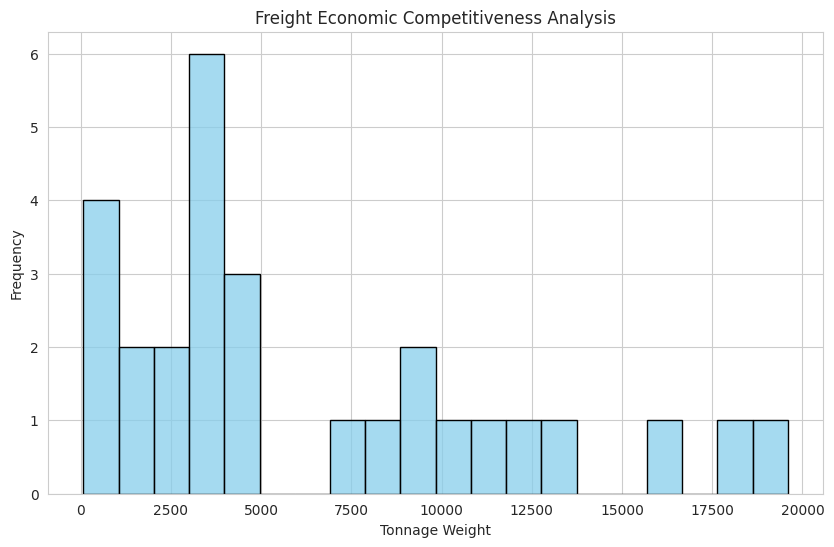

In [13]:
# identifying the tonnage weight column ['freight_ec']
freight_ec_column = freight_ec_data['freight_ec']

# Setting the style of seaborn
sns.set_style("whitegrid")

# Plotting the tonnage weight values
plt.figure(figsize=(10, 6))
sns.histplot(freight_ec_column, bins=20, color='skyblue', edgecolor='black')
plt.title('Freight Economic Competitiveness Analysis')
plt.xlabel('Tonnage Weight')
plt.ylabel('Frequency')
plt.show()

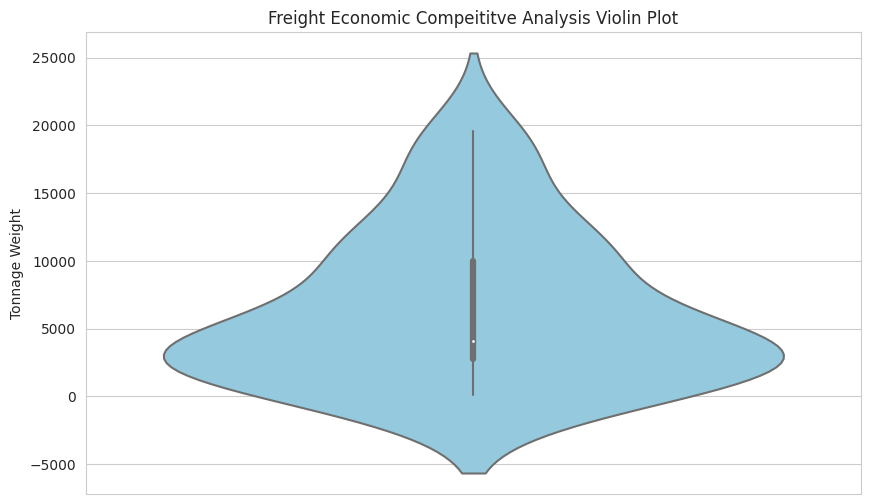

In [14]:
# identifying the tonnage weight column ['freight_ec']
freight_ec_column = freight_ec_data['freight_ec']

# Setting the style of seaborn
sns.set_style("whitegrid")

# Plotting the tonnage weight values using a violin plot
plt.figure(figsize=(10,6))
sns.violinplot(y=freight_ec_column, color='skyblue')
plt.title('Freight Economic Compeititve Analysis Violin Plot')
plt.ylabel('Tonnage Weight')
plt.show()

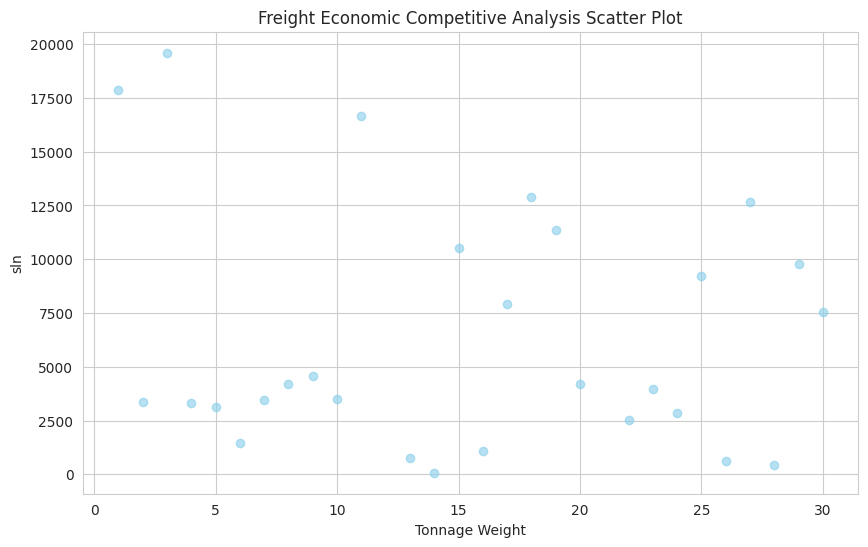

In [15]:
# identifying the tonnage weight column ['freight_ec']
freight_ec_column = freight_ec_data['freight_ec']

# Generating x values (assuming sln numbers as the x values)
#x_values = freight_ec_data['sln']
x_values = freight_ec_data.index

# Plotting the tonnage weight values using a scatterplot
plt.figure(figsize=(10,6))
plt.scatter(x_values, freight_ec_column, color='skyblue', alpha=0.6)
plt.title('Freight Economic Competitive Analysis Scatter Plot')
plt.ylabel('sln')
plt.xlabel('Tonnage Weight')
plt.grid(True)
plt.show()

#### Exports

In [16]:
# Export Notebooks

# PDF

In [17]:
# Hide the code cells and write to a PDF paramters without code
input_notebook = 'freight_truck_ec.ipynb'
output_pdf = 'freight_truck_ec_analysis_hidden_code.pdf'

In [18]:
# Hide the code cells and write to a PDF paramters with code
input_notebook_c = 'freight_truck_ec.ipynb'
output_pdf_c = 'freight_truck_ec_analysis.pdf'

In [19]:
# Create a PDF that hides the code cells
notebook_to_pdf_without_code(input_notebook, output_pdf)

Notebook successfully converted to PDF: freight_truck_ec_analysis_hidden_code.pdf


In [20]:
# Create a PDF that include the code cells
notebook_to_pdf_with_code(input_notebook_c, output_pdf_c)

Notebook successfully converted to PDF: freight_truck_ec_analysis.pdf


In [21]:
# CSV

In [22]:
# Create a CSV from the data
freight_ec_data.to_csv('freight_ec_data.csv', index=False)

# Print the success statement after the CSV has been exported
print(f"DataFrame exported to CSV successfully at freight_ec_data.csv")

DataFrame exported to CSV successfully at freight_ec_data.csv


In [23]:
# Parquet

In [24]:
# Define the output file path for the Parquet file
parquet_output_file = 'freight_ec_data.parquet'

# Export the DataFrame to Parquet using the export_to_parquet function
export_to_parquet(freight_ec_data, parquet_output_file)

DataFrame exported to Parquet successfully at freight_ec_data.parquet.
